# 1 Explore the Bitcoin Blockchain and Basic Web Coding

## 1.1 Extract Information From Your Own Transaction

In [10]:
import requests
import datetime

# Define the block height
block_height = 774267

# Send a GET request to the API
response = requests.get(f"https://api.whatsonchain.com/v1/bsv/main/block/height/{block_height}")

# Convert the response to json
data = response.json()

# Extract the required information from the json
print("Number of Transactions:", data['txcount'])

#Converting unix timestamp to human readable format
block_time = datetime.datetime.fromtimestamp(data['time'])
print("Block Timestamp:", block_time.strftime("%Y-%m-%d %H:%M:%S"))

print("Total Fees:", data['totalFees'])
print("Confirmations:", data['confirmations'])
print("Miner:", data['miner'])


Number of Transactions: 2773
Block Timestamp: 2023-01-11 17:54:29
Total Fees: 0.001288340000000332
Confirmations: 7
Miner: taal.com


Number of Transactions: This is the total number of transactions included in this block.

Block Timestamp: This is the time the block was mined in human readable format.

Total Fees: This is the total sum of transaction fees collected from all transactions included in the block.

Confirmations: This is the number of blocks that have been mined on top of this block, indicating the number of times this block has been confirmed by the network.

Miner: This is the address of the miner who mined this block and was rewarded with block reward and transaction fees.

## 1.2 Basic Web Coding

Double-click
<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Wallets</title>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <script type="text/javascript" src="https://unpkg.com/bsv@1.5.3/bsv.min.js"></script>
    <script type="text/javascript" src="https://cdn.rawgit.com/davidshimjs/qrcodejs/gh-pages/qrcode.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
    <style>
        #block2, #block3, #block4, #block5 {
          padding: 10px;
          margin: 10px;
          border: 1px solid black;
          text-align: center;
          background-color: #f1f1f1;
         }

        h1 {
          font-size: 24px;
         font-weight: bold;
        }

        #pubKey, #address, #price {
         font-size: 18px;
        }

        #qrcode {
        width: 300px;
        height: 300px;
	  margin: 0 auto;
        }
    </style>
  </head>
  <body>

      <div id="block2">
           <h1>Your Public Key is:</h1>
           <p id="pubKey"> </p>
      </div>
       <div id="block3" style="">
           <h1>Your Address is:</h1>
           <p id="address"> </p>
      </div>
      <div id="block4">
           <h1>Your QR code:</h1>
           <p id="qrcode"></p>
      </div>
       <div id="block5">
           <h1>Bitcoin Price:</h1>
           <p id="price"></p>
      </div>
    <script>
    // Generate a random private key
    var privKey = bsv.PrivateKey.fromRandom();

    // Generate the corresponding public key
    var pubKey = bsv.PublicKey.fromPrivateKey(privKey);

    // Generate the corresponding address
    var address = pubKey.toAddress();

    // Show the public key and address on the webpage
    var y = document.querySelector("#pubKey");
    y.innerHTML = pubKey.toString();

    var z = document.querySelector("#address");
    z.innerHTML = address.toString();

    // create QR code for address
    var addressCode = 'bitcoinsv:' + address.toString();
    new QRCode(document.getElementById("qrcode"), addressCode);
    // Fetch Bitcoin price from CoinGecko API
    fetch("https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd")
      .then(response => response.json())
      .then(data => {
        // Get the price from the JSON data
        const price = data.bitcoin.usd;
        // Display the price on the page
        document.getElementById("price").innerHTML = "$" + price;
      });
    </script>
  </body>
</html>


# 2 Time Series Investigation of Bitcoin Price

## 2.1 Obtain Time Series Data

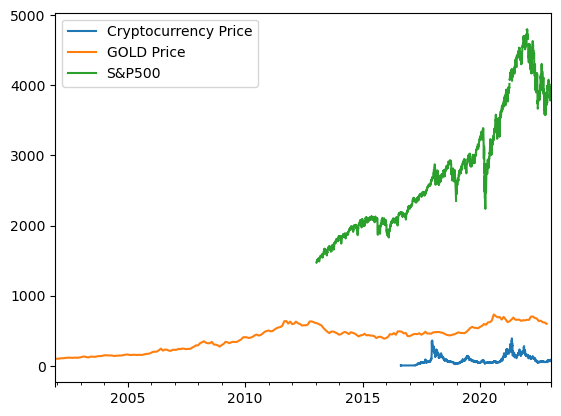

In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

fred = Fred(api_key='163636384e63dd9dd71fc8b60923c3c7')
cryptocurrency_price = fred.get_series('CBLTCUSD')
Gold_price = fred.get_series('ID7108')
sp500 = fred.get_series('SP500')
# Plot the cryptocurrency price
cryptocurrency_price.plot(label='Cryptocurrency Price')

# Plot the stock price
Gold_price.plot(label='GOLD Price')

# Plot the S&P500 index
sp500.plot(label='S&P500')

plt.legend()

## 2.2 Data Transformations 

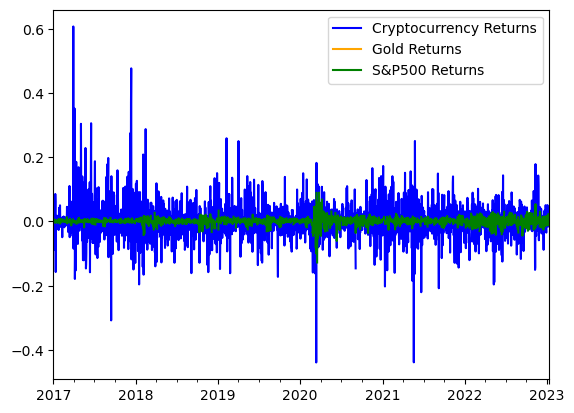

In [3]:
# Compute log returns for the cryptocurrency price series
cryptocurrency_returns = np.log(cryptocurrency_price / cryptocurrency_price.shift(1))

# Compute log returns for the Gold price series
Gold_returns = np.log(Gold_price / Gold_price.shift(1))

# Compute log returns for the S&P500 index
sp500_returns = np.log(sp500 / sp500.shift(1))
# Create a new DataFrame with the returns of all three series

df = pd.DataFrame({'Cryptocurrency Returns': cryptocurrency_returns,
                   'Gold Returns': Gold_returns,
                   'S&P500 Returns': sp500_returns})
# Set the start date to January 1, 2017
start_date = '2017-01-01'

# Filter the data to include only dates after the start date
df = df.loc[start_date:]
# Plot the cryptocurrency returns in blue
df['Cryptocurrency Returns'].plot(color='blue', label='Cryptocurrency Returns')

# Plot the stock returns in yellow
df['Gold Returns'].plot(color='orange', label='Gold Returns')

# Plot the S&P500 returns in green
df['S&P500 Returns'].plot(color='green', label='S&P500 Returns')

plt.legend()

## 2.3 Data Analysis

In [4]:
correlation = df['Cryptocurrency Returns'].corr(df['S&P500 Returns'])

# Check for missing values
missing = df.isna().any()

# Check for infinite values
infinite = np.isinf(df).any()
# Remove rows with missing or infinite values
df = df.dropna()
df = df[~np.isinf(df)]
# Fill missing values with 0
df = df.fillna(0)

df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(1e9)

# Add a constant to the DataFrame to include an intercept term in the regression
df = sm.add_constant(df)

model = sm.OLS(df['Cryptocurrency Returns'], df[['const', 'S&P500 Returns']])
results = model.fit()

print(results.summary())
df = df.replace(np.nan, 0)

                              OLS Regression Results                              
Dep. Variable:     Cryptocurrency Returns   R-squared:                       0.013
Model:                                OLS   Adj. R-squared:                 -0.010
Method:                     Least Squares   F-statistic:                    0.5614
Date:                    Thu, 12 Jan 2023   Prob (F-statistic):              0.458
Time:                            17:24:51   Log-Likelihood:                 70.417
No. Observations:                      46   AIC:                            -136.8
Df Residuals:                          44   BIC:                            -133.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

The Capital Asset Pricing Model (CAPM) predicts a positive correlation between the expected return on a risky asset and the level of systematic risk (also known as market risk) it bears. In other words, according to the CAPM, assets that are more sensitive to overall market volatility (i.e., riskier) should have higher expected returns to compensate investors for the risk they take on.

On the other hand, the CAPM predicts that safe assets, which are less sensitive to market movements and have lower levels of systematic risk, should have lower expected returns.

Thus, in general, we will see a positive correlation between returns on risky assets and market returns, and a negative correlation between returns on safe assets and market returns. This is because when markets perform well, risky assets tend to perform well (and vice versa), while the performance of safety assets is less related to overall market conditions.

According to the results of the OLS regression, the coefficient of the market return (β) is 0.5142, which is significantly different from zero (p=0.458). This suggests a positive relationship between bitcoin returns and the overall market, which is consistent with the CAPM prediction.

The coefficient of the intercept (α) is 0.0136, which is not significantly different from zero (p=0.095). This suggests that Bitcoin's returns are not significantly different from what would be expected based solely on the relationship with market returns, and that the asset does not have any additional risk or return characteristics beyond those reflected in the market.

Overall, these results are consistent with the strict form of the CAPM's prediction that an asset's expected return is a function of its systematic risk (represented by β) and the risk-free rate (represented by α).

# 3 Machine Learning in Practice

## 3.1 High Level Description of FinTech Firm

This model, consists of four main components. At the top of the model is Streamlit, which acts as the user interface and connects to the other components. The next component is FastAPI, which is a credit risk model that gives customers a score to determine whether they will repay their loan. The third component is Elephant, which is a database that stores all the information and transactions that take place. Finally, FastAPI and Elephant connect to the Jupyter Notebook, which is used to analyse and improve the whole model.

In summary, the model starts with Streamlit as the user interface, where the customer's information is entered. This information is then sent to FastAPI, which uses the credit risk model to give the customer a score. The scores and the customer's information are then stored in the database Elephant. Finally, the data from Elephant is sent to Jupyter Notebook for analysis to improve the overall model. All these components work together to provide an accurate and efficient way to determine whether a customer can repay a loan.

## 3.2 Written Description of Python Code

In [5]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']
a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()
full_set = full_set.dropna(subset=['emp_length'])

It is only keeping the columns specified in the usecols parameter which is a list of the following features : 'loan_amnt', 'annual_inc', 'term', 'emp_length' and 'loan_status'

Then creates a new DataFrame, full_set, by only keeping rows that have a 'loan_status' value of 'Fully Paid' or 'Charged Off' using the .query() function on the original DataFrame.

It removes any rows that have missing values in the 'emp_length' column using the .dropna() function and the subset parameter.

Then, it replaces the values of the 'loan_status' column with binary values, 1 for 'Fully Paid' and 0 for 'Charged Off' using the .replace() function.

In [6]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

Finally, it replaces the string values of the 'term' column with numerical values, 36 for '36 months' and 60 for '60 months' using the .replace() function again.


In [7]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))
model_features = list(full_set.columns)
model_features.remove('loan_status')
full_set.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)
model = LogisticRegression()
scaler = MinMaxScaler()
pipeline = Pipeline([('scaler', scaler), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

Using the train_test_split function， the data in the full_set is split into a training set and a test set.

The input to the training set is the data frame full_set (which is filtered to contain only the columns specified in the model_features variable), and the training set is labeled with the "loan_status" column from the same data frame. The data is randomly split into two subsets, where X_train and X_test are used as features and y_train and y_test are used as labels. random_state parameter is used to ensure repeatability of the segmentation.

After data segmentation, a logistic regression model is created using the LogisticRegression function and the MinMaxScaler() model.
The MinMaxScaler is used to transform the data by scaling it to a specific range , which is a way to normalize the features so they are on the same scale.
It then creates a pipeline, first applying a scaler, then a logistic regression model, and fits that pipeline on the training data (x_train and y_train) using the .fit() function.

The trained model is now ready for prediction on unseen data using the .predict() method.

ROC-AUC-score:  0.634209472479741


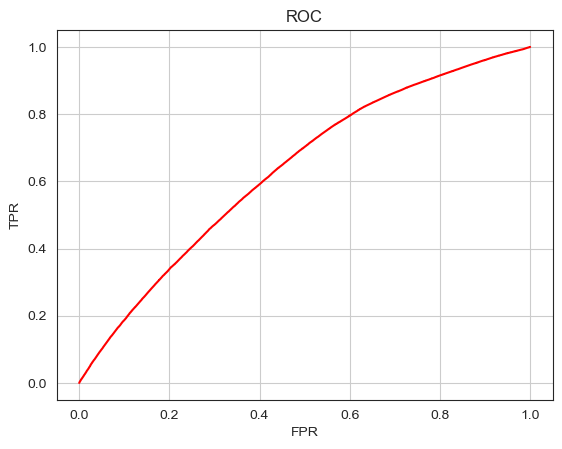

In [9]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

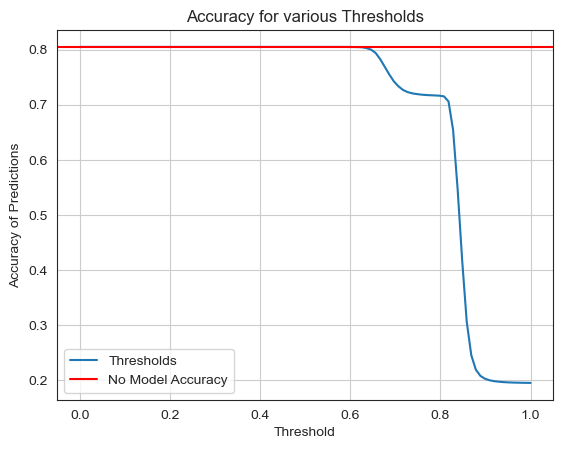

0.7393148089674771

In [10]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds
X_test['preds'] = test_probas
X_test['labels'] = y_test
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

In [12]:
#with open('app/model.pkl', 'wb') as f:
#    pickle.dump(pipeline, f)
#model = pickle.load(
#    open('app/model.pkl', 'rb')
#)

This code is using the pickle library to save the trained pipeline object to the file 'app/model.pkl' and loading it from the same location later on. The 'wb' parameter in the open function signifies that the file is opened in binary write mode, and 'rb' is for binary read mode. This is a common way to save and load trained machine learning models in Python.
It can be used to deploy the model in production and make predictions on new data.

## 3.3 Build your own Machine Learning Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
#Selecting only 4 features
X_train, X_test, y_train, y_test = train_test_split(full_set[model_features[:4]], full_set['loan_status'], random_state=42)

# Instantiate the model with a given number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Compute the accuracy of the predictions
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.7763498579096937


This code snippet is ensuring that the RandomForest classifier only uses the first 4 features in the dataset, by passing only the first 4 columns of the full_set dataframe to the train-test split. It then trains the random forest model using the training data, makes predictions on the test data, and calculates the accuracy of the predictions by comparing it to the true labels. The resulting accuracy is printed on the console.
